# <b>AASD 4015 Project 2 - A New Hybrid CNN Classifier and Compare the Performance with 2 CNN Transfer Learning Models</b>

### <b>Member:</b> 1. Chun Cheong Mak (101409987) 2. Hei Yuet Lee (101409639)

<font size=3>The purpose of this project is to explore a way to build a <font color=red>new hybrid CNN classifier</font> by calculating the cosine similarity of feature vectors of 2 different images. The project is inspired by the concept of <font color=red>ensemble learning</font> discussed in the AASD 4000 - Machine Learning I and an article about image search using <font color=red>cosine similarity</font> of feature vectors of 2 different images. After building the new hybrid CNN classifier, it will be compared with other CNN transfer learning models. The link and literature review of the article is listed below:</font>

### <b>Article - Image based search engine with CNN and Transfer Learning by Dhruv Shrinet</b>
<font size=3>The link of the article:</font>
https://medium.com/swlh/image-based-search-engine-with-cnn-and-transfer-learning-153a1a3e58b4
<br><br>
<font size=3>This article demonstrate a way to make a simlpe image searcher by calculating the <font color=red>cosine similarity</font> of feature vectors of 2 different images. The author can find a new image and search images look similar from his database.</font>

1. Use the first to the second last layer of a <font color=red>pre-trained model (ResNet50)</font> to build a feature vector extractor of images. 

2. Use the extractor to calculate the feature vectors of all images in database.

3. Calculate the feature vector of a new image that cannot be found in database.

4. Calculate the cosine similarity between the feature vector of the new image and all the feature vectors of the database.

5. Print the most similar images by sorting.

### <b>Data - 70 Dog Breeds-Image Data Set</b>
<font size=3>The link of Kaggle:</font>
https://www.kaggle.com/datasets/gpiosenka/70-dog-breedsimage-data-set

### <b>The Main Idea of the New Hybrid CNN classifier in AASD 4015 Project 2:</b>
<font size=3>A new hybrid CNN classifier for classifying the breeds of dog is built as follows:</font>

1. Use <font color=red>the first to the second last layer</font> of a <font color=red>ResNet50</font> model to build a first feature vector extractor.

2. Use <font color=red>the first to the second last layer</font> of a <font color=red>Xception</font> model to build a second feature vector extractor.

3. Use the 2 extractors to calculate the 2 feature vectors of each images in training set.

4. Calculate the 2 feature vectors of a new image that is being classified.

5. Calculate the <font color=red>ResNet50 cosine similarity</font> of the <font color=red>ResNet50 feature vectors</font> of the new image and the <font color=red>ResNet50 feature vectors</font> of each image in each breed in the training set.

6. Calculate the <font color=red>Xception cosine similarity</font> of the <font color=red>Xception feature vectors</font> of the new image and the <font color=red>Xception feature vectors</font> of each image in each breed in the training set.

7. Use the idea of ensemble learning, calculate the weighted sum of the above 2 cosine similarity of the new image and each image in each breed in the training set.

8. Save weighted sum for each breed if the weighted sum is larger than certain threshold.

9. Count the total number of saved weighted sum for each breed.

10. Classify the new image by comparing the the total number of saved weighted sum of each breed.

<font size=3>More details about the mechanism of the hybrid CNN classifier will be discussed in the notebook. The main takeaways from this notebook:
- Explore, preprocess the dataset 
- Build functions and models for building hybrid CNN classifier
- Produce feature vectors
- Prediction by the hybrid CNN classifier
- Validation and Testing of the hybrid CNN classifier
- Build 2 baseline CNN transfer learning models
- Compare the performance with the baseline models by test accuracy</font>

#### <b>Table of Contents:</b><br>
<font size=3>
&nbsp;&nbsp;&nbsp;&nbsp;1. Data Preprocessing<br>
&nbsp;&nbsp;&nbsp;&nbsp;2. Data Visualization<br>
&nbsp;&nbsp;&nbsp;&nbsp;3. Models and Functions for building the Hybrid Model<br>
&nbsp;&nbsp;&nbsp;&nbsp;4. Feature Vectors<br>
&nbsp;&nbsp;&nbsp;&nbsp;5. Prediction, Validation and Testing of the Hybrid Model<br>
&nbsp;&nbsp;&nbsp;&nbsp;6. Compare with 2 CNN Transfer Learning Models<br>
&nbsp;&nbsp;&nbsp;&nbsp;7. Summary and Discussion

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications import resnet
from keras.applications.xception import Xception
from keras.applications import xception

from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os, shutil, pathlib
from sklearn.metrics.pairwise import cosine_similarity

2023-04-06 14:24:15.514220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 1. Data Preprocessing

<font size=3>There are 70 breeds in the data set and the name of each breeds is saved in `breed_list`</font>

In [ ]:
breed_list = os.listdir('data/train/')
breed_list.remove('.DS_Store')
print(breed_list)

['Yorkie', 'Greyhound', 'Corgi', 'Mex Hairless', 'Boston Terrier', 'Blenheim', 'Scotch Terrier', 'Rottweiler', 'Elk Hound', 'Schnauzer', 'Bull Mastiff', 'Pomeranian', 'Pekinese', 'Pit Bull', 'Basenji', 'French Bulldog', 'Coyote', 'Komondor', 'Great Perenees', 'Basset', 'Great Dane', 'Dhole', 'Lhasa', 'Labrador', 'Chinese Crested', 'Cocker', 'Chihuahua', 'Shiba Inu', 'Newfoundland', 'Dalmation', 'Bull Terrier', 'Pug', 'Afghan', 'Cairn', 'Beagle', 'Cockapoo', 'Vizsla', 'Collie', 'Irish Wolfhound', 'American Spaniel', 'Maltese', 'African Wild Dog', 'Doberman', 'Shih-Tzu', 'German Sheperd', 'Labradoodle', 'Groenendael', 'Border Collie', 'Shar_Pei', 'Bearded Collie', 'Bermaise', 'Saint Bernard', 'Rhodesian', 'Siberian Husky', 'Japanese Spaniel', 'Borzoi', 'Chow', 'Airedale', 'Dingo', 'American Hairless', 'Irish Spaniel', 'Poodle', 'Malinois', 'Bichon Frise', 'Golden Retriever', 'Clumber', 'Boxer', 'Bulldog', 'Bloodhound', 'Bluetick']


<font size=3>After unzipping the file from Kaggle, we got a folder called data. we found that the number of images of each breed in train, valid and test folders in the data folder are <b>NOT</b> the same. To avoid the problem of data imbalance, we make a new folder called breed and three folders called train, valid and test inside it for preprocessing data.</font>

In [ ]:
os.mkdir('breed')
os.mkdir('breed/train')
os.mkdir('breed/valid')
os.mkdir('breed/test')
for i in breed_list:
    os.mkdir(f'breed/train/{i}')
    os.mkdir(f'breed/valid/{i}')
    os.mkdir(f'breed/test/{i}')

<font size=3>The minimum number of training images in one of 70 breeds is 65. Therefore, we should choose number smaller than or equal to 65 as the number of training images from each breed for data preprocessing.</font>

In [ ]:
var1 = []
for breed in breed_list:
    var1.append(len(os.listdir('data/train/'+f'{breed}')))
print(min(var1))

65


<font size=3>We choose 64, 8 and 8 images from each breed from the original train, valid and test set respectively. The reason is to maintain the ratio of 0.8, 0.1, 0.1.</font>

In [ ]:
for i in breed_list:
    source = 'data/train/'+f'{i}'
    for j in os.listdir(source)[:64]:
        shutil.copy(src=source+'/'+f'{j}', dst='breed/train/'+f'{i}')

In [ ]:
for i in breed_list:
    source = 'data/valid/'+f'{i}'
    for j in os.listdir(source)[:8]:
        shutil.copy(src=source+'/'+f'{j}', dst='breed/valid/'+f'{i}')

In [ ]:
for i in breed_list:
    source = 'data/test/'+f'{i}'
    for j in os.listdir(source)[:8]:
        shutil.copy(src=source+'/'+f'{j}', dst='breed/test/'+f'{i}')

<font size=3> Now, we have totally 4480, 560 and 560 images for training, validation and testing.</font>

### 2. Data Visulaization

<font size=3>By observation, some breeds look similar. For example, the color and shape of Basset and Beagle are close.</font>

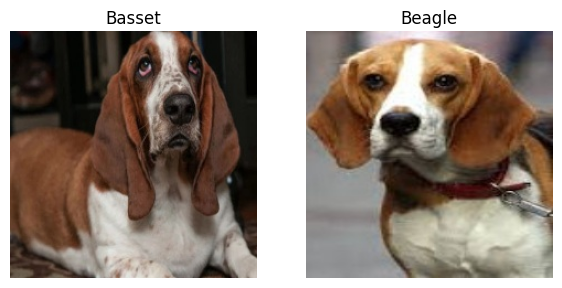

In [ ]:
plt.figure(figsize=(7, 7))
img1 = mpimg.imread('breed/train/Basset/004.jpg')
ax = plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Basset')
plt.axis('off')
ax = plt.subplot(1, 2, 2)
img2 = mpimg.imread('breed/train/Beagle/010.jpg')
plt.imshow(img2)
plt.title('Beagle')
plt.axis('off')
plt.show()

<font size=3>For Maltese and Shih-Tzu, it is difficult to distinguish them by the naked eye.</font>

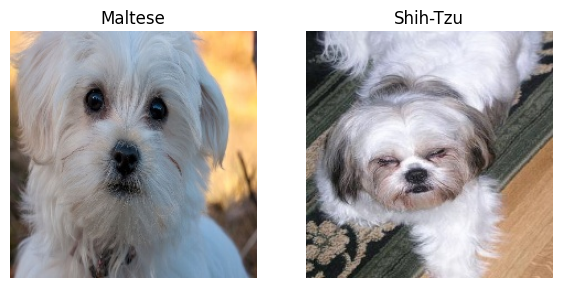

In [ ]:
plt.figure(figsize=(7, 7))
img1 = mpimg.imread('breed/train/Maltese/015.jpg')
ax = plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Maltese')
plt.axis('off')
ax = plt.subplot(1, 2, 2)
img2 = mpimg.imread('breed/train/Shih-Tzu/076.jpg')
plt.imshow(img2)
plt.title('Shih-Tzu')
plt.axis('off')
plt.show()

<font size=3>Above breeds could be the potential challenge of building the new hybrid model.</font>

### 3. Models and Functions for Building the Hybrid Model

<font size=3>The main reference of the coding in Section 3 is the article mentioned above: <b>Image based search engine with CNN and Transfer Learning</b>.
<br><br>
<font size=3>The pre-trained model of ResNet50 and Xception are used to build feature vector extractors. Only <font color=red>the first to the second last layer</font> are considered.</font>

In [ ]:
model_resnet = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model_xception=Xception(weights='imagenet',input_shape=(299, 299, 3))
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
model_n_resnet = Model(model_resnet.input, model_resnet.layers[-2].output)

In [ ]:
model_n_xception = Model(model_xception.input, model_xception.layers[-2].output)

<font size=3>`preprocess_img_resnet` and `preprocess_img_xception` are made to preprocess the image into proper format and data type for their corresponding feature vector extractors. These two functions are used in the `encode_img_resnet` and `encode_img_xception` respectively.</font>

In [ ]:
def preprocess_img_resnet(img):
    img = load_img(img, target_size=(224, 224,))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = resnet.preprocess_input(img)
    return img

In [ ]:
def preprocess_img_xception(img):
    img = load_img(img, target_size=(299, 299,))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = xception.preprocess_input(img)
    return img

<font size=3>`encode_img_resnet` and `encode_img_xception` will return the <font color=red>ResNet50 feature vector</font> and <font color=red>Xception feature vector</font> respectively of a particular image. The vectors will be used to calculate the cosine similarity.</font>

In [ ]:
def encode_img_resnet(img):
    img = preprocess_img_resnet(img)
    feature_v = model_n_resnet.predict(img)
    feature_v = feature_v.reshape((-1,))
    return feature_v

In [ ]:
def encode_img_xception(img):
    img = preprocess_img_xception(img)
    feature_v = model_n_xception.predict(img)
    feature_v = feature_v.reshape((-1,))
    return feature_v

### 4. Feature Vectors

<font size=3>`feature_resnet` and `feature_xception` are two dictionaries for storing the <font color=red>ResNet50 feature vectors</font> and <font color=red>Xception feature vectors</font> for each breed. As we have 70 breeds to consider, there are 70 keys indicating the name of each breed in `feature_resnet` and `feature_xception`.</font>

In [ ]:
feature_resnet = {}
feature_xception = {}
for i in breed_list:
    feature_resnet[f'{i}'] = []
    feature_xception[f'{i}'] = []

<font size=3>For each key, there is a corresponding list for storing the 64 feature vectors. The following nested `for` loop is adding the feature vectors into each list by the 2 functions `encode_img_resnet` and `encode_img_xception`.</font>

In [ ]:
for i in breed_list:
    temp_path = 'breed/train/'+f'{i}'
    print(temp_path)
    print(os.listdir(temp_path))
    for j in os.listdir(temp_path):
        feature_vector = encode_img_resnet(temp_path+'/'+f'{j}')
        feature_resnet[f'{i}'].append(feature_vector)
        feature_vector = encode_img_xception(temp_path+'/'+f'{j}')
        feature_xception[f'{i}'].append(feature_vector)

<font size=3>Before reading Section 5, let's see what we have. We have gotten 2 dictionaries: `feature_resnet` and `feature_xception`. For each dictionary, there are 70 keys that are the names of the 70 breeds of dog. For each key, there is a list storing 64 feature vectors produced by `encode_img_resnet` or `encode_img_xception` (depends on whether it is `feature_resnet` or `feature_xception`).</font>

### 5. Prediction, Validation and Testing of the Hybrid Model

<font size=3>To explain the algorithm of the hybrid model clearly, I will explain with an example and my handwritten notes.</font>

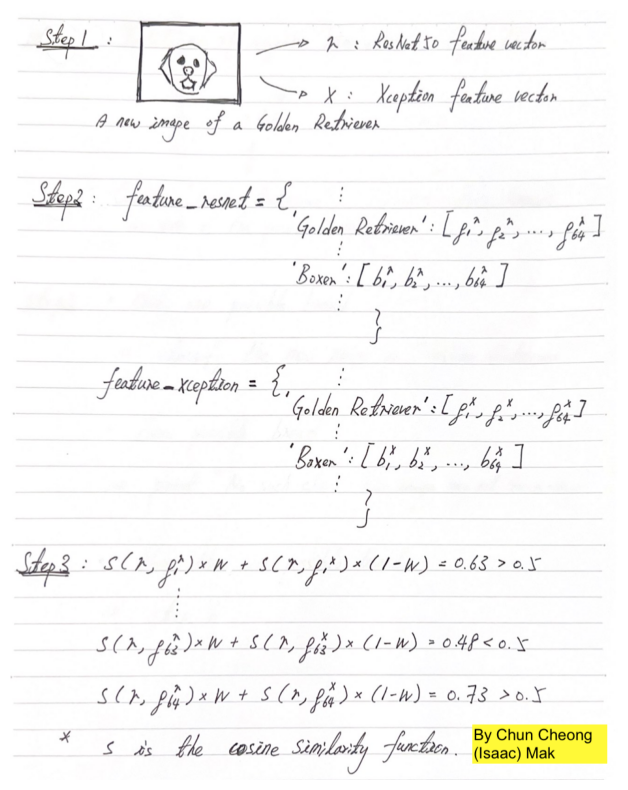

In [ ]:
plt.figure(figsize=(10, 10))
img1 = mpimg.imread('1.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

<font size=3>In step 1, I input a new image which is a <b>Golden Retriever</b>. `encode_img_resnet` and `encode_img_xception` will generate a <font color=red>ResNet50 feature vector</font> and a <font color=red>Xception feature vector</font> respectively.</font>
<br><br>
<font size=3>In step 2, `feature_resnet` and `feature_xception` are examined. In this example, we will focus on the <b>Golden Retriever</b> in `feature_resnet` and `feature_xception` to illustrate the algorithm. In `feature_resnet`, there are 64 <font color=red>ResNet50 feature vectors</font> stored in a list which is corresponding to <b>Golden Retriever</b>. In `feature_xception`, there are 64 <font color=red>Xception feature vectors</font> stored in a list which is corresponding to <b>Golden Retriever</b>.</font>
<br><br>
<font size=3>In step 3, calculate the weighted sum of <font color=red>ResNet50 cosine similarity</font> and <font color=red>Xception cosine similarity</font> and check whether the weighted sum is larger than 0.5. In my handwritten note, $w$ is used to indicate the weight and $s$ is the cosine similarity function.</font>

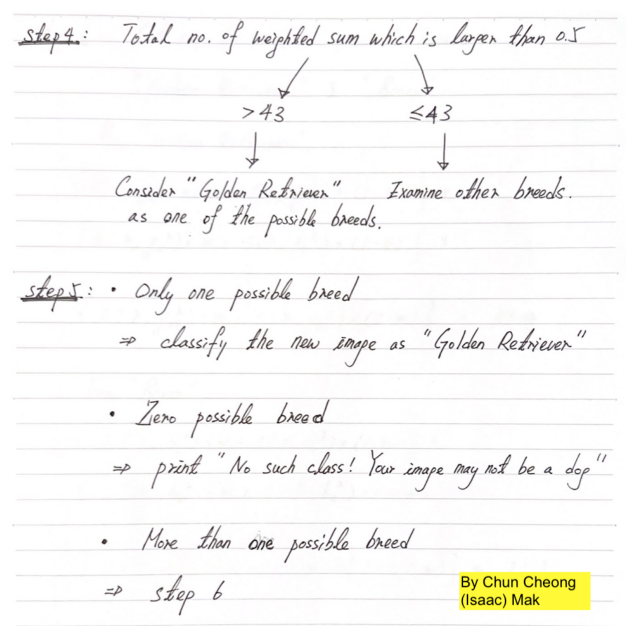

In [ ]:
plt.figure(figsize=(8, 8))
img1 = mpimg.imread('2.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

<font size=3>In step 4, if the total number of <font color=red>weighted sum which is larger than 0.5</font> is higher than 43, <b>Golden Retriever</b> is considered to be one of the possible correct breeds. If not, just examine other breeds.</font>
<br><br>
<font size=3>In step 5, if the total number of possible correct breeds is just 1, then the hybrid model will classify the image as <b>Golden Retriever</b>. If the total number of possible correct breeds is zero, then the hybrid model will print: No such class! Your image may not be a dog. <font color=red>If the total number of possible correct breeds is larger than 1, go to step 6.</font></font>

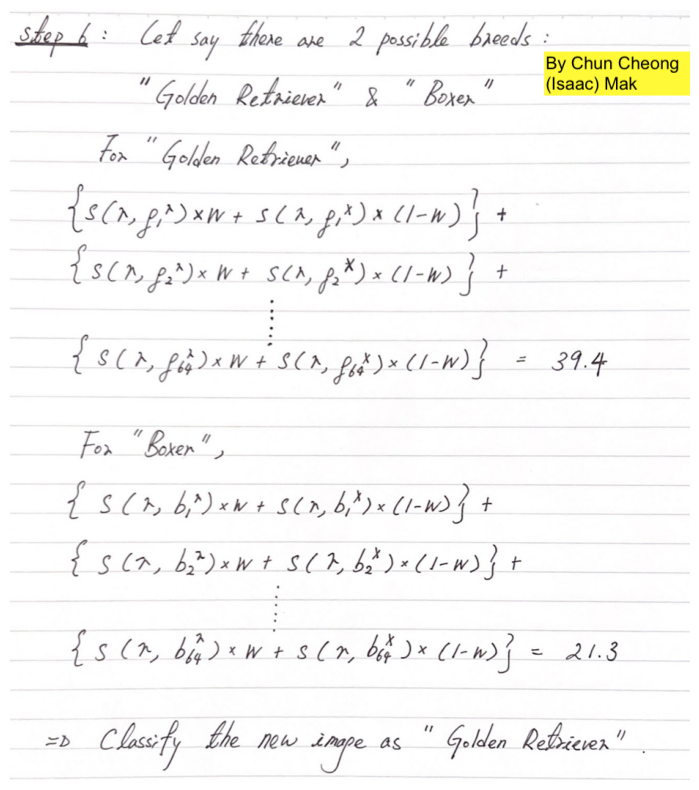

In [ ]:
plt.figure(figsize=(10, 10))
img1 = mpimg.imread('3.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

<font size=3>In step 6, let say there are 2 possible correct breeds: <b>Golden Retriever</b> and <b>Boxer</b>. The algorithmn will sum up the corresponding weighted sum of <font color=red>ResNet50 cosine similarity</font> and <font color=red>Xception cosine similarity</font> and check whose sum is larger. In this example, the total sum of <b>Golden Retriever</b> is 39.4, while the total sum of <b>Boxer</b> is 21.3. The algorithmn will classify the input image as <b>Golden Retriever</b>.</font>

<font size=3>The mechanism of `prediction` below follows above rationale.</font>

In [ ]:
def prediction(testing, w1=0.5, thre_score=0.5, thre_num=43):
    # Generate feature vectors for the input image
    check_resent = encode_img_resnet(testing)
    check_xcep = encode_img_xception(testing)
    name = []
    # Examine the feature_resnet and feature_xception
    for i in breed_list:
        temp_list_resent = feature_resnet[f'{i}']
        temp_list_xcep = feature_xception[f'{i}']
        temp1 = []
        for m, n in zip(temp_list_resent, temp_list_xcep):
            # Calculate the weighted sum
            score_resent = cosine_similarity(check_resent.reshape(1,-1), m.reshape(1,-1))[0][0]
            score_xcep = cosine_similarity(check_xcep.reshape(1,-1), n.reshape(1,-1))[0][0]
            score = w1*score_resent + (1-w1)*score_xcep
            # Check the weighted sum
            if score > thre_score:
                temp1.append(score)
                # Check the total number of weighted sum which is larger than thre_score
                if len(temp1) > thre_num:
                    name.append(i)
    
    ############################################## Three possible cases ####################################################
    name_list = list(dict.fromkeys(name))
    # Only one possibility
    if len(name_list)==1:
        for k in name_list:
            print("This is a", k)
            return k
    # More than one possibility
    elif len(name_list)>1:
        temp2 = []
        for l in name_list:
            temp3 = []
            temp_list2_resent = feature_resnet[f'{l}']
            temp_list2_xcep = feature_xception[f'{l}']
            for s, t in zip(temp_list2_resent, temp_list2_xcep):
                score_resent = cosine_similarity(check_resent.reshape(1,-1), s.reshape(1,-1))[0][0]
                score_xcep = cosine_similarity(check_xcep.reshape(1,-1), t.reshape(1,-1))[0][0]
                score = w1*score_resent + (1-w1)*score_xcep
                temp3.append(score)
            temp2.append(sum(temp3))
        print("This is a", name_list[np.argmax(temp2)])
        return name_list[np.argmax(temp2)]
    # Zero possibility
    elif len(name_list)==0:
        print("No such class! Your image may not be a dog")
        return 'X'

<font size=3>Let's use `prediction` to check whether it can predict a Golden Retriever in validation set correctly.</font>

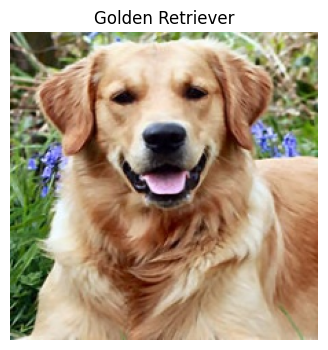

In [ ]:
plt.figure(figsize=(4, 4))
img1 = mpimg.imread('breed/valid/Golden Retriever/01.jpg')
plt.imshow(img1)
plt.title('Golden Retriever')
plt.axis('off')
plt.show()

In [ ]:
prediction('breed/valid/Golden Retriever/01.jpg')

1/1 [==============================] - 0s 142ms/step
This is a Golden Retriever


'Golden Retriever'

<font size=3>What if I input an image of a human face?</font>

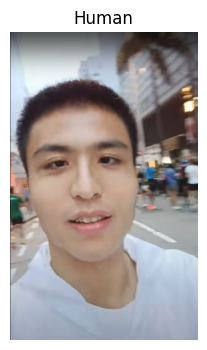

In [ ]:
plt.figure(figsize=(4, 4))
img1 = mpimg.imread('human.jpeg')
plt.imshow(img1)
plt.title('Human')
plt.axis('off')
plt.show()

In [ ]:
prediction('human.jpeg')

1/1 [==============================] - 0s 158ms/step
No such class! Your image may not be a dog


'X'

<font size=3>The hybrid classifier will <b>NOT</b> classify the image of human as one of the 70 breeds but tell you that you may input some irrelevant images. This is what a traditional CNN classfication model <font color=red><b>CANNOT</b></font> do.</font>

<font size=3>`accuracy` can calculate the valid accuracy or test accuracy. The idea is to use the above `prediction` to predict the valid and test set and count the number of correct predictions. Finally, the number is divided by the total number of images in valid set or test set and return the accuracy of the hybrid CNN classifier under different settings.</font>

In [ ]:
def accuracy(set='valid', w1=0.5, thre_score=0.5, thre_num=43):
    pred = []
    real = []
    count = 0
    for breed in breed_list:
        path1 = 'breed/'+set+'/'+f'{breed}'
        path1_img = os.listdir('breed/'+set+'/'+f'{breed}')
        for img in path1_img:
            pred_img = path1+'/'+img
            pred.append(prediction(pred_img, w1=w1, thre_score=thre_score, thre_num=thre_num))
        for img in range(len(path1_img)):
            real.append(breed)
    for x, y in zip(real, pred):
        if x == y:
            count += 1
    print("The accuracy:", count/len(real))
    return count/len(real)

<font size=3>We will try different weights and check the validation accuracy. The setting which produces the highest validation accuracy will be used in the remaining section and its test accuracy will be checked.</font>

##### w1=0

In [ ]:
acc_valid_1 = accuracy(set='valid', w1=0, thre_score=0.5, thre_num=43)

In [ ]:
print(f"validation accuracy: {acc_valid_1:.3f}")

validation accuracy: 0.916


##### w1=0.3

In [ ]:
acc_valid_2 = accuracy(set='valid', w1=0.3, thre_score=0.5, thre_num=43)

In [ ]:
print(f"validation accuracy: {acc_valid_2:.3f}")

validation accuracy: 0.930


##### w1=0.5

In [ ]:
acc_valid_3 = accuracy(set='valid', w1=0.5, thre_score=0.5, thre_num=43)

In [ ]:
print(f"validation accuracy: {acc_valid_3:.3f}")

validation accuracy: 0.925


##### w1=0.8

In [ ]:
acc_valid_4 = accuracy(set='valid', w1=0.8, thre_score=0.5, thre_num=43)

In [ ]:
print(f"validation accuracy: {acc_valid_4:.3f}")

validation accuracy: 0.916


##### w1=1

In [ ]:
acc_valid_5 = accuracy(set='valid', w1=1, thre_score=0.5, thre_num=43)

In [ ]:
print(f"validation accuracy: {acc_valid_5:.3f}")

validation accuracy: 0.877


<font size=3>From above evaulation, 0.3 will be the weight and the test accuracy is 0.939.</font>

In [ ]:
acc_test_hybrid = accuracy(set='test', w1=0.3, thre_score=0.5, thre_num=43)

In [ ]:
print(f"Test accuracy: {acc_test_hybrid:.3f}")

Test accuracy: 0.939


### 6. Compare with 2 CNN Transfer Learning Models

<font size=3>Two CNN models will be built by transfer learning. The first use <font color=red>ResNet50</font> and the second one use <font color=red>Xception</font>. After building the models, their test accuracy will be calcualted for comparison. This section is done seperately on Colab and <font color=red>the code in this section basically follows the code in the AASD 4015 Project 1 for simplicity</font>.</font>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/AASD-4015-P2/

/content/gdrive/MyDrive/AASD-4015-P2


In [5]:
train_dataset = image_dataset_from_directory(
    '/content/gdrive/MyDrive/AASD-4015-P2/breed/train',
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    '/content/gdrive/MyDrive/AASD-4015-P2/breed/valid',
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    '/content/gdrive/MyDrive/AASD-4015-P2/breed/test',
    image_size=(224, 224),
    batch_size=32)

Found 4480 files belonging to 70 classes.
Found 560 files belonging to 70 classes.
Found 560 files belonging to 70 classes.


In [6]:
class_names = train_dataset.class_names

In [7]:
def plot_graph(history_model):
  accuracy = history_model.history["accuracy"]
  val_accuracy = history_model.history["val_accuracy"]
  loss = history_model.history["loss"]
  val_loss = history_model.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()

#### Baseline Model 1: Transfer learning of ResNet50

In [9]:
conv_base_resnet = keras.applications.resnet.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [10]:
conv_base_resnet.trainable = False
inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.resnet.preprocess_input(inputs)
x = conv_base_resnet(x)
x = layers.Flatten()(x)
outputs = layers.Dense(70, activation='softmax')(x)
model_base_resnet = keras.Model(inputs, outputs)

In [11]:
model_base_resnet.compile(loss='sparse_categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=["accuracy"])

In [12]:
import os
if not os.path.exists('saved_model'):
    os.makedirs('saved_model')

In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="saved_model/model_base_resnet.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [14]:
history_base_resnet = model_base_resnet.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
140/140 [==============================] - 125s 771ms/step - loss: 11.0455 - accuracy: 0.6217 - val_loss: 3.1114 - val_accuracy: 0.8536
Epoch 2/30
140/140 [==============================] - 3s 24ms/step - loss: 1.6365 - accuracy: 0.9208 - val_loss: 3.6170 - val_accuracy: 0.8482
Epoch 3/30
140/140 [==============================] - 4s 28ms/step - loss: 0.6589 - accuracy: 0.9621 - val_loss: 2.0376 - val_accuracy: 0.8982
Epoch 4/30
140/140 [==============================] - 4s 28ms/step - loss: 0.2731 - accuracy: 0.9835 - val_loss: 1.7043 - val_accuracy: 0.9143
Epoch 5/30
140/140 [==============================] - 4s 24ms/step - loss: 0.1689 - accuracy: 0.9920 - val_loss: 2.0511 - val_accuracy: 0.8946
Epoch 6/30
140/140 [==============================] - 3s 24ms/step - loss: 0.1229 - accuracy: 0.9935 - val_loss: 2.0532 - val_accuracy: 0.9071
Epoch 7/30
140/140 [==============================] - 3s 24ms/step - loss: 0.0501 - accuracy: 0.9971 - val_loss: 1.8295 - val_accuracy: 0.

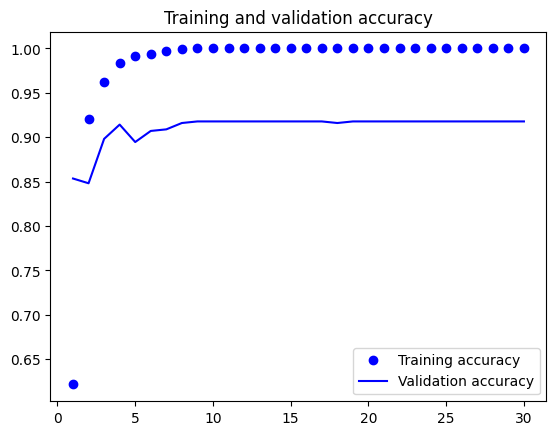

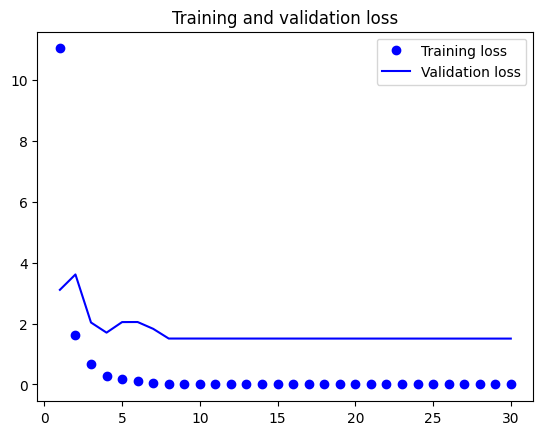

In [15]:
plot_graph(history_base_resnet)

In [16]:
test_model = keras.models.load_model("saved_model/model_base_resnet.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

18/18 [==============================] - 12s 305ms/step - loss: 2.4228 - accuracy: 0.9125
Test accuracy: 0.913
Test loss: 2.423


#### Baseline Model 2: Transfer learning of Xception

In [18]:
conv_base_xception = keras.applications.xception.Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 0s 0us/step


In [19]:
conv_base_xception.trainable = False
inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.xception.preprocess_input(inputs)
x = conv_base_xception(x)
x = layers.Flatten()(x)
outputs = layers.Dense(70, activation='softmax')(x)
model_base_xception = keras.Model(inputs, outputs)

In [20]:
model_base_xception.compile(loss='sparse_categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=["accuracy"])

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="saved_model/model_base_xception.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [22]:
history_base_xception = model_base_xception.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
140/140 [==============================] - 8s 34ms/step - loss: 4.3587 - accuracy: 0.7634 - val_loss: 1.7327 - val_accuracy: 0.9000
Epoch 2/30
140/140 [==============================] - 4s 28ms/step - loss: 1.4758 - accuracy: 0.9107 - val_loss: 1.1571 - val_accuracy: 0.9232
Epoch 3/30
140/140 [==============================] - 4s 24ms/step - loss: 0.9283 - accuracy: 0.9431 - val_loss: 1.4436 - val_accuracy: 0.9143
Epoch 4/30
140/140 [==============================] - 4s 24ms/step - loss: 0.5900 - accuracy: 0.9554 - val_loss: 1.2429 - val_accuracy: 0.9268
Epoch 5/30
140/140 [==============================] - 4s 24ms/step - loss: 0.4136 - accuracy: 0.9710 - val_loss: 1.4464 - val_accuracy: 0.9250
Epoch 6/30
140/140 [==============================] - 5s 34ms/step - loss: 0.2539 - accuracy: 0.9783 - val_loss: 0.8853 - val_accuracy: 0.9339
Epoch 7/30
140/140 [==============================] - 4s 24ms/step - loss: 0.1742 - accuracy: 0.9855 - val_loss: 0.9685 - val_accuracy: 0.9411

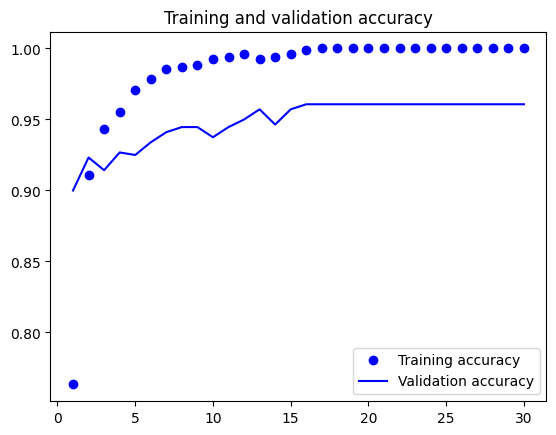

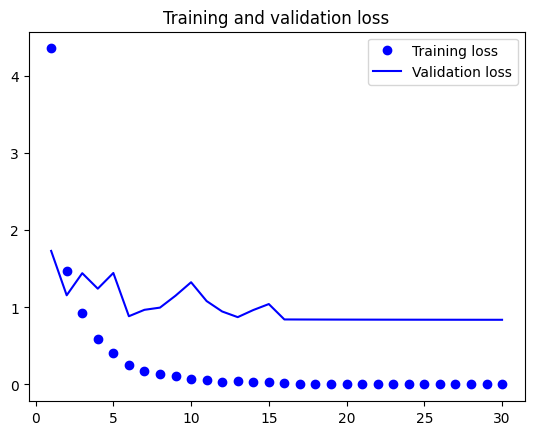

In [23]:
plot_graph(history_base_xception)

In [24]:
test_model = keras.models.load_model("saved_model/model_base_xception.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

18/18 [==============================] - 1s 22ms/step - loss: 0.7850 - accuracy: 0.9625
Test accuracy: 0.962
Test loss: 0.785


<font size=3>Last but not least, let also perform simple fine-tuning to the above two baseline models and make comparison. <font color=red>The approach and code of fine-tuning basically follows the latter part of the AASD 4015 Project 1</font>.</font>

#### Fine-tuning Baseline Model 1

In [26]:
conv_base_resnet.trainable = True
for layer in conv_base_resnet.layers[:-4]:
    layer.trainable = False

In [27]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s) 
    return exponential_decay_fn

In [28]:
exponential_decay_fn = exponential_decay(lr0=0.00001, s=80)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [29]:
model_base_resnet.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="saved_model/model_base_resnet_fine_tuned.h5",
        save_best_only=True,
        monitor="val_loss"),
        lr_scheduler
]

In [31]:
history_base_resnet_fine_tuned = model_base_resnet.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
140/140 [==============================] - 11s 38ms/step - loss: 4.9968e-06 - accuracy: 1.0000 - val_loss: 1.5950 - val_accuracy: 0.9161 - lr: 1.0000e-05
Epoch 2/30
140/140 [==============================] - 4s 26ms/step - loss: 4.5205e-08 - accuracy: 1.0000 - val_loss: 1.6323 - val_accuracy: 0.9179 - lr: 9.7163e-06
Epoch 3/30
140/140 [==============================] - 4s 26ms/step - loss: 4.0126e-08 - accuracy: 1.0000 - val_loss: 1.6271 - val_accuracy: 0.9179 - lr: 9.4406e-06
Epoch 4/30
140/140 [==============================] - 4s 27ms/step - loss: 6.1169e-08 - accuracy: 1.0000 - val_loss: 1.6277 - val_accuracy: 0.9179 - lr: 9.1728e-06
Epoch 5/30
140/140 [==============================] - 4s 26ms/step - loss: 6.0137e-09 - accuracy: 1.0000 - val_loss: 1.6256 - val_accuracy: 0.9179 - lr: 8.9125e-06
Epoch 6/30
140/140 [==============================] - 4s 26ms/step - loss: 5.3218e-10 - accuracy: 1.0000 - val_loss: 1.6253 - val_accuracy: 0.9179 - lr: 8.6596e-06
Epoch 7/30
140/

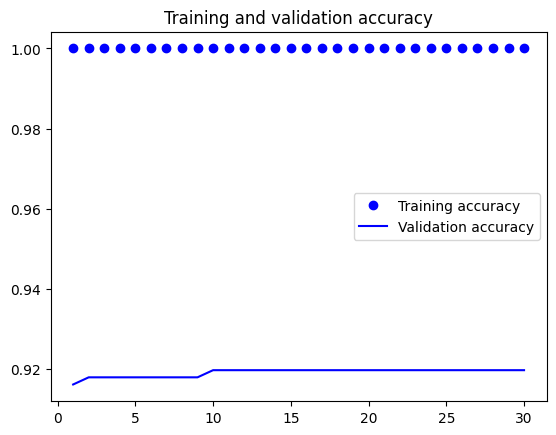

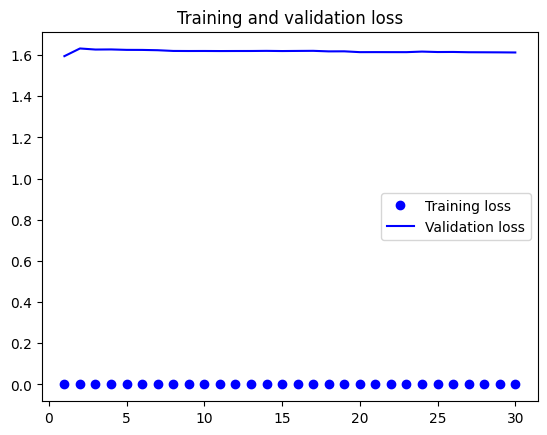

In [32]:
plot_graph(history_base_resnet_fine_tuned)

In [33]:
test_model = keras.models.load_model("saved_model/model_base_resnet_fine_tuned.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

18/18 [==============================] - 1s 20ms/step - loss: 2.4429 - accuracy: 0.9161
Test accuracy: 0.916
Test loss: 2.443


#### Fine-tuning Baseline Model 2

In [35]:
conv_base_xception.trainable = True
for layer in conv_base_xception.layers[:-4]:
    layer.trainable = False

In [36]:
model_base_xception.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="saved_model/model_base_xception_fine_tuned.h5",
        save_best_only=True,
        monitor="val_loss"),
        lr_scheduler
]

In [38]:
history_base_xception_fine_tuned = model_base_xception.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
140/140 [==============================] - 10s 38ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.6935 - val_accuracy: 0.9554 - lr: 1.0000e-05
Epoch 2/30
140/140 [==============================] - 5s 33ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.6461 - val_accuracy: 0.9518 - lr: 9.7163e-06
Epoch 3/30
140/140 [==============================] - 5s 33ms/step - loss: 6.3873e-04 - accuracy: 0.9998 - val_loss: 0.6383 - val_accuracy: 0.9536 - lr: 9.4406e-06
Epoch 4/30
140/140 [==============================] - 4s 29ms/step - loss: 6.9924e-06 - accuracy: 1.0000 - val_loss: 0.6401 - val_accuracy: 0.9536 - lr: 9.1728e-06
Epoch 5/30
140/140 [==============================] - 5s 33ms/step - loss: 1.8486e-04 - accuracy: 1.0000 - val_loss: 0.6242 - val_accuracy: 0.9536 - lr: 8.9125e-06
Epoch 6/30
140/140 [==============================] - 5s 34ms/step - loss: 4.0413e-04 - accuracy: 0.9998 - val_loss: 0.6088 - val_accuracy: 0.9554 - lr: 8.6596e-06
Epoch 7/30
140/140 [===

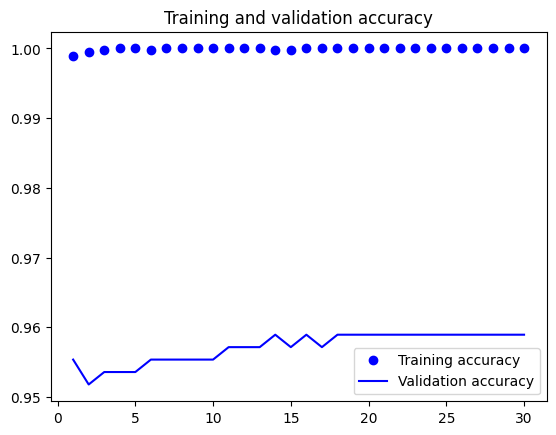

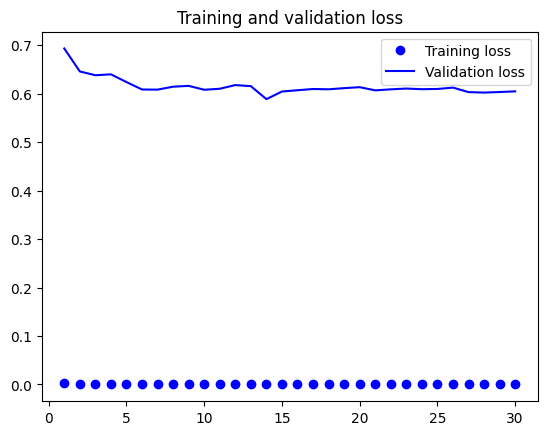

In [39]:
plot_graph(history_base_xception_fine_tuned)

In [40]:
test_model = keras.models.load_model("saved_model/model_base_xception_fine_tuned.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

18/18 [==============================] - 1s 21ms/step - loss: 0.6438 - accuracy: 0.9625
Test accuracy: 0.962
Test loss: 0.644


### 7. Summary and Discussion

| Model                                            | Test Accuracy |
| ------------------------------------------------ | ------------- |
| Hybrid CNN Classifier                             | 0.939         |
| Baseline Model 1: Transfer learning of ResNet50  | 0.913         |
| Baseline Model 2: Transfer learning of Xception  | 0.962         |
| Baseline Model 1 after Fine-tuning               | 0.916         |
| Baseline Model 2 after Fine-tuning               | 0.962         |

<font size=3>The test accuracy of hybrid CNN classifier is 0.939 that is at the middle among all the 5 models' test accuracy. Moreover, the fine-tuning is not customized. The approach is from the AASD 4015 Project 1 for simplicity. Although this hybrid CNN classifier is not an outstanding model, there are still some advantages I would like to mention.</font>

<font size=3>First, this hybrid CNN classifier can identify images that do not belong to the 70 classes. In Section 5, the hybrid CNN classifier can successfully identify that the image of human does not belong to the 70 classes. For traditional classification models, they will classify the image of human as one of 70 classes.</font>

<font size=3>Second, this hybrid CNN classifier is built without using GPU but this model also use CNN. This may be an alternative for somebody who don't have a laptop with GPU or don't want to pay to use Colab.</font>

<font size=3>Next, I want to mention some possible improvement. We may do hyper-parameter tuning to find out the best setting of this hybrid CNN classifier and also introduce more pre-trained models. Only ResNet50 and Xception are used in this hybrid CNN classifier. Third model like InceptionV3 may be a good choice to introduced.</font>